In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential,layers
import matplotlib.pyplot as plt
import os
from tensorflow.keras import models


In [2]:
img_size = 256
batch_size = 32
channels = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("Plant Village",batch_size=32,
    image_size=(img_size,img_size),
    shuffle=True)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names
n_classes = len(class_names)
n_classes

3

In [5]:
len(dataset)

68

Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight


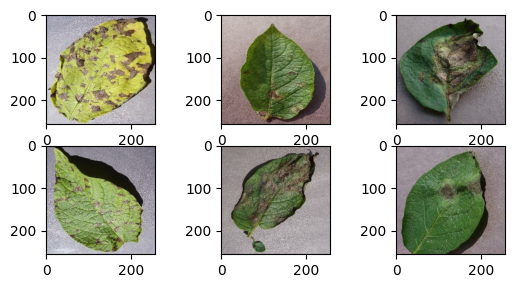

In [6]:
for image_batch,label_batch in dataset.take(1):
    for i in range(6):
        plt.subplot(3,3,i+1)
        print(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
    

In [7]:
# 80% of data gets to be trained,10% of data get to validation,rest for testing
len(dataset)

68

In [8]:
68*0.8

54.400000000000006

In [9]:
68*0.1

6.800000000000001

In [10]:
# 54 batch is going for training, 

In [11]:
train = dataset.take(54)

In [12]:
a = dataset.skip(54)

In [13]:
validate = a.take(7)

In [14]:
test = a.skip(7)

In [15]:
len(test)

7

In [16]:
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validate = validate.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [17]:
lay = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/225),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [18]:
input_shape = (batch_size,img_size,img_size,channels)
model = Sequential([
    lay,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax')
])

In [19]:
model.build(input_shape = input_shape)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [21]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
             metrics = ['accuracy'])


In [24]:
history = model.fit(train,epochs = 10,batch_size = batch_size,verbose =1,validation_data = validate)

Epoch 1/10
54/54 [==============================] - 1576s 29s/step - loss: 0.8911 - accuracy: 0.5029 - val_loss: 0.9796 - val_accuracy: 0.4286
Epoch 2/10
54/54 [==============================] - 479s 9s/step - loss: 0.7149 - accuracy: 0.6435 - val_loss: 0.5817 - val_accuracy: 0.7277
Epoch 3/10
54/54 [==============================] - 261s 5s/step - loss: 0.4307 - accuracy: 0.8108 - val_loss: 0.3939 - val_accuracy: 0.8393
Epoch 4/10
54/54 [==============================] - 232s 4s/step - loss: 0.3301 - accuracy: 0.8646 - val_loss: 0.2707 - val_accuracy: 0.8884
Epoch 5/10
54/54 [==============================] - 250s 5s/step - loss: 0.2574 - accuracy: 0.8970 - val_loss: 0.2411 - val_accuracy: 0.8973
Epoch 6/10
54/54 [==============================] - 247s 5s/step - loss: 0.1985 - accuracy: 0.9242 - val_loss: 0.2993 - val_accuracy: 0.8616
Epoch 7/10
54/54 [==============================] - 226s 4s/step - loss: 0.2108 - accuracy: 0.9138 - val_loss: 0.2073 - val_accuracy: 0.9196
Epoch 8/10


In [25]:
scores = model.evaluate(test)

7/7 [==============================] - 11s 905ms/step - loss: 0.1517 - accuracy: 0.9400


In [26]:
history

In [27]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
acc = history.history['accuracy']
acc

[0.5028935074806213,
 0.6435185074806213,
 0.8107638955116272,
 0.8645833134651184,
 0.8969907164573669,
 0.9241898059844971,
 0.9137731194496155,
 0.9299768805503845,
 0.8987268805503845,
 0.9334490895271301]

In [35]:
val = history.history['val_accuracy']
val

[0.4285714328289032,
 0.7276785969734192,
 0.8392857313156128,
 0.8883928656578064,
 0.8973214030265808,
 0.8616071343421936,
 0.9196428656578064,
 0.9419642686843872,
 0.9107142686843872,
 0.9553571343421936]

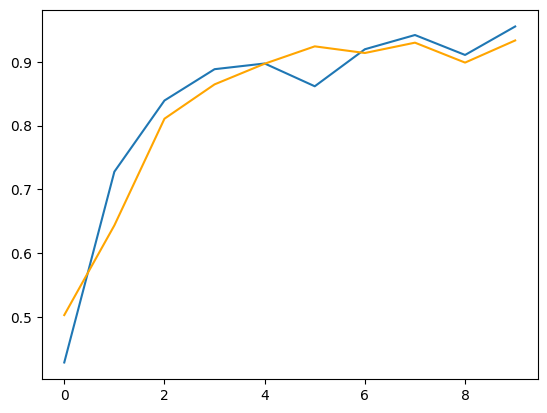

In [40]:
plt.plot(range(10),val)
plt.plot(range(10),acc,color = 'orange')

In [42]:
os.getcwd()

'C:\\Users\\nandh\\OneDrive\\Desktop\\python projects'

In [50]:
model.save("Potato_model")

INFO:tensorflow:Assets written to: Potato_model\assets


INFO:tensorflow:Assets written to: Potato_model\assets


In [4]:
from keras.models import load_model

In [5]:
model = models.load_model('Potato_model')